In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# LOAD DỮ LIỆU
df = pd.read_csv('Economic_S4.csv')

In [3]:
df.head()

,Year,Inflation,Lending_Interest_Rate,Unemployment,GDP,NPL
0,2006,0.074182,0.111763,0.0464,0.0698,0.0188
1,2007,0.083444,0.111812,0.0465,0.0813,0.0050
2,2008,0.231154,0.157836,0.0464,0.0466,0.0589
3,2009,0.067178,0.100691,0.0443,0.0512,0.0403
4,2010,0.092075,0.131353,0.0360,0.0642,0.0238


In [4]:
# 1. Kiểm tra thông số thống kê của mỗi biến
print("--------------------------")
print(df['Inflation'].describe())
print("--------------------------")
print(df['Unemployment'].describe())
print("--------------------------")
print(df['Lending_Interest_Rate'].describe())
print("--------------------------")
print(df['GDP'].describe())
print("--------------------------")
print(df['NPL'].describe())
print("--------------------------")

--------------------------
count    14.000000
mean      0.076006
std       0.062763
min       0.006312
25%       0.035251
50%       0.066553
75%       0.089071
max       0.231154
Name: Inflation, dtype: float64
--------------------------
count    14.000000
mean      0.037729
std       0.005974
min       0.030900
25%       0.032525
50%       0.036100
75%       0.043125
max       0.046500
Name: Unemployment, dtype: float64
--------------------------
count    14.000000
mean      0.105032
std       0.033178
min       0.069694
25%       0.074558
50%       0.102217
75%       0.126468
max       0.169538
Name: Lending_Interest_Rate, dtype: float64
--------------------------
count    18.000000
mean      0.056717
std       0.015489
min       0.026300
25%       0.047750
50%       0.060950
75%       0.067775
max       0.081300
Name: GDP, dtype: float64
--------------------------
count    14.000000
mean      0.029686
std       0.018673
min       0.005000
25%       0.019150
50%       0.023900
75%   

In [5]:
# 2. Vẽ phân phối dữ liệu dạng box plots
# Tạo DF mới loại bỏ Biến Year và NPL trong DF gốc sau đó vẽ các biểu đồ box với từng biến
df_box = df[['Inflation', 'Lending_Interest_Rate', 'Unemployment', 'GDP']]

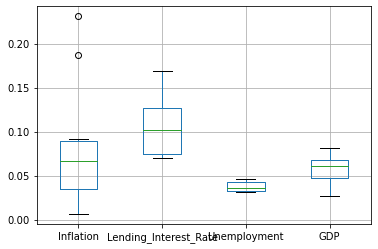

In [6]:
# Chạy hàm boxplot để vẽ biểu đồ Box và lấy các giá trị của box. Hàm này trả về 2 giá trị ax và bp.
# Ý nghĩa tham số return type:
# 1. ‘axes’ returns the matplotlib axes the boxplot is drawn on
# 2. ‘dict’ returns a dictionary whose values are the matplotlib Lines of the boxplot.
# 3. ‘both’ returns a namedtuple with the axes and dict.
ax, bp = pd.DataFrame.boxplot(df_box, return_type='both')

In [7]:
# # In dữ liệu của box và viết giá trị của các điểm này vào biểu đồ box
# # outliers: trả về mảng giá trị nằm bên ngoài. Mảng chưa mỗi giá trị của chuỗi outlier
# # boxes: trả về mảng gồm 5 giá trị của box sẽ nối thành hình box gồm cận trên cận dưới box
# # medians: trả về mảng gồm 2 giá trị nối 2 điểm nằm ở giữa đường line mầu xanh lá cây
# # whiskers: trả về 2 mảng mỗi mảng gồm 2 giá trị vẽ từ cạnh box đến ria 2 đầu
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print("outliers:")
print(outliers)

outliers:
[array([0.231154, 0.186777], dtype=object), array([], dtype=object), array([], dtype=object), array([], dtype=object)]


In [8]:
for i in range(4):
    for j in range(len(outliers[i])):
        ax.text(i+1, outliers[i][j], "{:.4f}".format(outliers[i][j]))
print("boxes:")
print(boxes)

boxes:
[array([0.03525125, 0.03525125, 0.08907125, 0.08907125, 0.03525125]), array([0.074558  , 0.074558  , 0.12646775, 0.12646775, 0.074558  ]), array([0.032525, 0.032525, 0.043125, 0.043125, 0.032525]), array([0.04775 , 0.04775 , 0.067775, 0.067775, 0.04775 ])]


In [9]:
pad = 0.2
for i in range(4):
    ax.text(i+1+pad, boxes[i][1], "{:.4f}".format(boxes[i][1]))
    ax.text(i+1+pad, boxes[i][2], "{:.4f}".format(boxes[i][2]))
print("medians:")
print(medians)
print(medians[0][0], medians[0][1])

medians:
[array([0.0665525, 0.0665525]), array([0.1022165, 0.1022165]), array([0.0361, 0.0361]), array([0.06095, 0.06095])]
0.0665525 0.0665525


In [10]:
for i in range(4):
    ax.text(i+1, medians[i][0], "{:.2f}".format(medians[i][0]))
print("whiskers:")
print(whiskers)

whiskers:
[array([0.03525125, 0.006312  ]), array([0.08907125, 0.092075  ]), array([0.074558, 0.069694]), array([0.12646775, 0.169538  ]), array([0.032525, 0.0309  ]), array([0.043125, 0.0465  ]), array([0.04775, 0.0263 ]), array([0.067775, 0.0813  ])]


In [11]:
for i in range(4): #[0,3]
    for j in range(2): #[0,1]
        ax.text(i + 1, whiskers[i*2+j][1], "{:.2f}".format(whiskers[i*2+j][1]))
    ax.text(i + 1, whiskers[i][1], "{:.2f}".format(whiskers[i][1]))

# plt.show()

In [12]:
# QUANTILES

# In quantiles theo các quãng 1%, 25%, 50%, 75%, 99%
quantiles = df_box.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

      Inflation  Lending_Interest_Rate  Unemployment       GDP
0.01   0.008960               0.069822      0.030926  0.027354
0.25   0.035251               0.074558      0.032525  0.047750
0.50   0.066553               0.102217      0.036100  0.060950
0.75   0.089071               0.126468      0.043125  0.067775
0.99   0.225385               0.168017      0.046487  0.079889


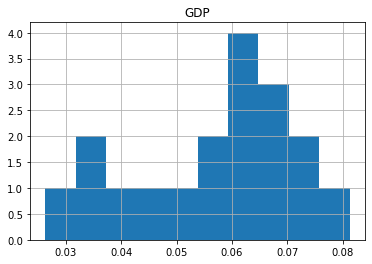

In [13]:
# HISTOGRAM
# 3. Vẽ phân phối dữ liệu dạng historical, 
# Hàm của Python mặc định chia dữ liệu thành 10 bin, 
# muốn thay đổi có thể điều chỉnh giá trị bin
df_hist = df[['GDP']]
hist = df_hist.hist(bins=10) 
plt.show()

In [14]:
# SCATTER
df_scatter = df[['GDP','NPL']]

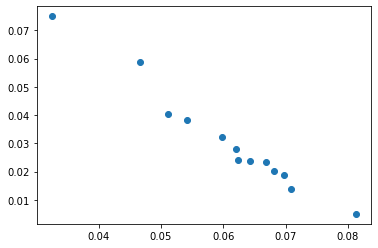

In [15]:
x = df_scatter['GDP'][:13]
y = df_scatter['NPL'][:13]

plt.scatter(x, y)

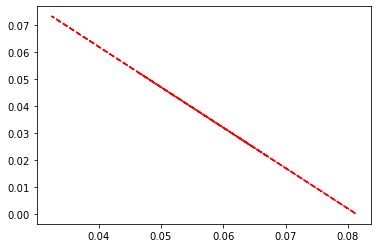

In [16]:
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

In [22]:
# CORRELATION
# 5. Ma trận tương quan giữa các biến trên 3 method khác nhau
df_corr = df[['Inflation', 'Lending_Interest_Rate', 'Unemployment', 'GDP','NPL']]
print("-----------Kết quả pearson---------------")
print(df_corr.corr(method='pearson', min_periods=1))
print("-----------Kết quả kendall---------------")
print(df_corr.corr(method='kendall'))
print("------------Kết quả spearman--------------")
print(df_corr.corr(method='spearman'))


-----------Kết quả pearson---------------
                       Inflation  Lending_Interest_Rate  Unemployment  \
Inflation               1.000000               0.925695      0.422299   
Lending_Interest_Rate   0.925695               1.000000      0.414612   
Unemployment            0.422299               0.414612      1.000000   
GDP                    -0.381281              -0.428401     -0.218992   
NPL                     0.418171               0.442572      0.293610   

                            GDP       NPL  
Inflation             -0.381281  0.418171  
Lending_Interest_Rate -0.428401  0.442572  
Unemployment          -0.218992  0.293610  
GDP                    1.000000 -0.984688  
NPL                   -0.984688  1.000000  
-----------Kết quả kendall---------------
                       Inflation  Lending_Interest_Rate  Unemployment  \
Inflation               1.000000               0.846154      0.419896   
Lending_Interest_Rate   0.846154               1.000000      0.3535

In [23]:
# MÔ HÌNH VÀ PHÂN TÍCH KẾT QUẢ
# Chọn biến đưa vào mô hình: Biến X = GDP và Y = NPL
X_Train = df['GDP'][:14].values.reshape(-1,1)
Y_Train = df['NPL'][:14].values.reshape(-1,1)

In [24]:
# Xây dựng mô hình linear với sklearn
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_Train, Y_Train)

LinearRegression()

In [25]:
# Dự báo kết quả Tỷ lệ nợ xấu trên số liệu dự báo của GPD 4 năm tiếp theo với sklearn
X_Test = df['GDP'][-4:].values.reshape(-1, 1)
print('GDP dự tính cho 4 năm tiếp theo: \n', X_Test)
Y_Pred = regr.predict(X_Test)
print('Dự đoán tỷ lệ nợ xấu NPL theo biến động của GDP: \n', Y_Pred)

# In các giá trị của hàm Hồi quy để kiểm tra mô hình
# In giá trị Hệ số chặn/ Hằng số Intercept và Hệ số góc Coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

GDP dự tính cho 4 năm tiếp theo: 
 [[0.0263]
 [0.0336]
 [0.0396]
 [0.0586]]
Dự đoán tỷ lệ nợ xấu NPL theo biến động của GDP: 
 [[0.08225604]
 [0.07139335]
 [0.06246511]
 [0.03419235]]
Intercept: 
 [0.12139149]
Coefficients: 
 [[-1.48803999]]


In [26]:
# In kết quả hồi quy tuyến tính thông qua phương pháp OLS với statsmodels
import statsmodels.api as sm
X_Train = sm.add_constant(X_Train)  # adding a constant
model = sm.OLS(Y_Train, X_Train , alpha=0.05).fit()
print_model = model.summary()
print(print_model)

# Tính phần dư Residual từ OLS
res_ols = model.resid  # residuals
print(res_ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     382.9
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.80e-10
Time:                        12:54:26   Log-Likelihood:                 60.839
No. Observations:                  14   AIC:                            -117.7
Df Residuals:                      12   BIC:                            -116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1214      0.005     25.431      0.0

C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
# Vẽ phân phối dữ liệu của phần dư Residual để phân tích kết quả
df_hist_ols =pd.DataFrame(res_ols)
df_hist_ols.rename(columns={df_hist_ols.columns[0]: "Residual"}, inplace=True)
print(df_hist_ols)
print(df_hist_ols.describe())
df_gdp = df ['GDP'][:14]
df_res = pd.concat([df_hist_ols, df_gdp], axis=1, sort=False)
print("-----------Kết quả pearson giữa Residual và GDP---------------")
print(df_res.corr(method='pearson', min_periods=1))
print("------------Kết quả spearman giữa Residual và GDP--------------")
print(df_res.corr(method='spearman'))

    Residual
0   0.001274
1   0.004586
2   0.006851
3  -0.004904
4  -0.002059
5  -0.004538
6   0.001970
7  -0.002340
8  -0.000107
9   0.001310
10 -0.001084
11  0.000144
12 -0.002338
13  0.001235
           Residual
count  1.400000e+01
mean   1.548860e-17
std    3.255110e-03
min   -4.903846e-03
25%   -2.268528e-03
50%    1.866426e-05
75%    1.300608e-03
max    6.851170e-03
-----------Kết quả pearson giữa Residual và GDP---------------
              Residual           GDP
Residual  1.000000e+00 -1.250601e-15
GDP      -1.250601e-15  1.000000e+00
------------Kết quả spearman giữa Residual và GDP--------------
          Residual       GDP
Residual  1.000000  0.125275
GDP       0.125275  1.000000


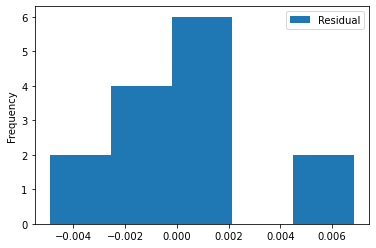

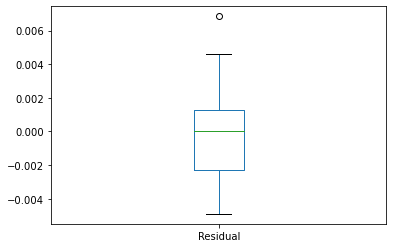

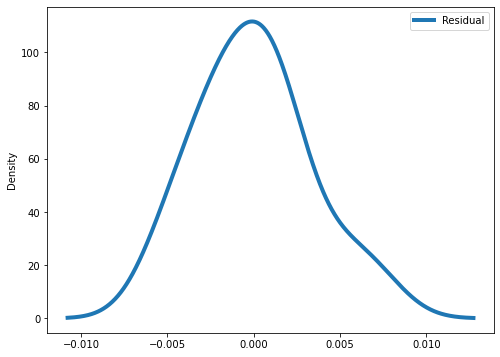

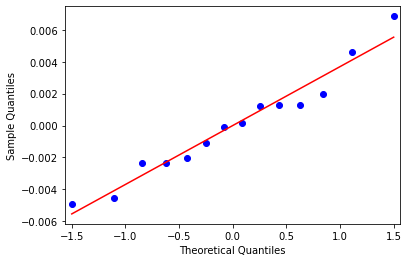

In [28]:
df_hist_ols.plot(kind='hist', stacked=True, bins=5)
df_hist_ols.plot(kind='box')
df_hist_ols.plot.density(figsize=(8, 6), linewidth=4)
fig = sm.qqplot(res_ols, line='r')
plt.show()
# sys.exit()

In [29]:
# MULTI REGRESSION
# print(df)
df_combine = df[:14]
# print(df_combine)
X = df_combine[['Inflation', 'Lending_Interest_Rate', 'Unemployment', 'GDP']] 
Y = df_combine['NPL']
print(X)
print(Y)
regr = LinearRegression()
regr.fit(X,Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

    Inflation  Lending_Interest_Rate  Unemployment     GDP
0    0.074182               0.111763        0.0464  0.0698
1    0.083444               0.111812        0.0465  0.0813
2    0.231154               0.157836        0.0464  0.0466
3    0.067178               0.100691        0.0443  0.0512
4    0.092075               0.131353        0.0360  0.0642
5    0.186777               0.169538        0.0325  0.0624
6    0.090947               0.134717        0.0396  0.0325
7    0.065927               0.103742        0.0362  0.0542
8    0.040846               0.086656        0.0385  0.0598
9    0.006312               0.071175        0.0326  0.0668
10   0.026682               0.069694        0.0353  0.0621
11   0.035203               0.070675        0.0311  0.0681
12   0.035396               0.073719        0.0319  0.0708
13   0.027958               0.077075        0.0309  0.0730
0     0.0188
1     0.0050
2     0.0589
3     0.0403
4     0.0238
5     0.0240
6     0.0750
7     0.0384
8     0.032

In [30]:
# with statsmodels
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(Y, X).fit()
        
print_model = model.summary()
print(print_model)
# Tính phần dư Residual từ OLS
res_ols = model.resid  # residuals
print(res_ols)
# Vẽ phân phối dữ liệu của phần dư Residual để phân tích kết quả
df_hist_ols =pd.DataFrame(res_ols)
df_hist_ols.rename(columns={df_hist_ols.columns[0]: "Residual"}, inplace=True)
print(df_hist_ols)
print(df_hist_ols.describe())
df_unemployment = df ['Unemployment'][:14]
df_res = pd.concat([df_hist_ols, df_unemployment], axis=1, sort=False)
print("-----------Kết quả pearson giữa Residual và Unemployment---------------")
print(df_res.corr(method='pearson', min_periods=1))
print("------------Kết quả spearman giữa Residual và Unemployment--------------")
print(df_res.corr(method='spearman'))

                            OLS Regression Results                            
Dep. Variable:                    NPL   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.56e-07
Time:                        12:56:19   Log-Likelihood:                 63.390
No. Observations:                  14   AIC:                            -116.8
Df Residuals:                       9   BIC:                            -113.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


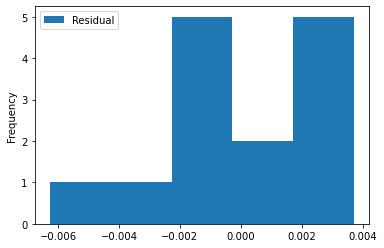

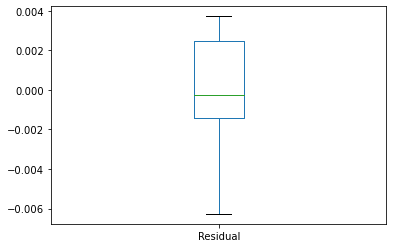

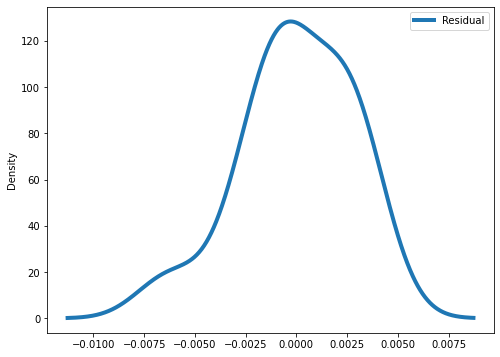

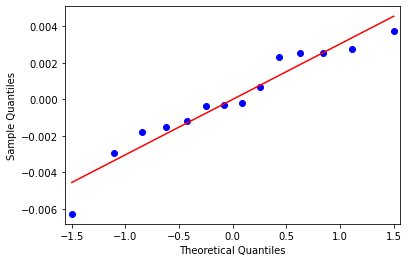

In [31]:
df_hist_ols.plot(kind='hist', stacked=True, bins=5)
df_hist_ols.plot(kind='box')
df_hist_ols.plot.density(figsize=(8, 6), linewidth=4)
fig = sm.qqplot(res_ols, line='r')
plt.show()
# sys.exit()

In [32]:
#--------------------------------IN TỔ HỢP CÁC KẾT QUẢ HỒI QUY THEO TỪNG BIẾN
arr = ['Inflation', 'Lending_Interest_Rate', 'Unemployment', 'GDP']
i = 0
# for r in range(1,5):
for sub in (arr):
	i = i+1
	print("Model : ", i, np.asarray(sub))
	X = df_combine[np.asarray(sub)]
	print(X)
	Y = df_combine['NPL']
	print(Y)
	X = X.values.reshape(-1,1)
	# with sklearn
	regr = LinearRegression()
	regr.fit(X, Y)

	print('Intercept: \n', regr.intercept_)
	print('Coefficients: \n', regr.coef_)

	# with statsmodels
	X = sm.add_constant(X)  # adding a constant
	model = sm.OLS(Y, X).fit()
	print_model = model.summary()
	print(print_model)

# sys.exit()

Model :  1 Inflation
0     0.074182
1     0.083444
2     0.231154
3     0.067178
4     0.092075
5     0.186777
6     0.090947
7     0.065927
8     0.040846
9     0.006312
10    0.026682
11    0.035203
12    0.035396
13    0.027958
Name: Inflation, dtype: float64
0     0.0188
1     0.0050
2     0.0589
3     0.0403
4     0.0238
5     0.0240
6     0.0750
7     0.0384
8     0.0323
9     0.0233
10    0.0279
11    0.0202
12    0.0137
13    0.0140
Name: NPL, dtype: float64
Intercept: 
 0.020229844103060737
Coefficients: 
 [0.12440987]
                            OLS Regression Results                            
Dep. Variable:                    NPL   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.543
Date:                Fri, 28 Jun 2024   Prob (F-statistic):              0.137
Time:                        12:56:55   Log-Likelihood:                

C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\tanth_000\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
